In [2]:
import pandas as pd
import numpy as np

In [3]:
mca = pd.read_csv('../../Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv') #importing data frame

def threshold_drop(x):
    x = input("Maximum % accepted to drop nulls: ")
    return x

def threshold_replace(x):
    x = input("Maximum % accepted to use median to replace nulls: ")
    return x

for col in data.columns:
  if data[col].dtype == np.int64:
    print("I'm a int64 :-)")
  elif data[col].dtype == np.object:
    print("I'm an object")
  ...

In [4]:
def clean_dataset(data,c1,c2):
    '''function to clean a dataset'''
    
    #define accepted values
    #c1 = input("Maximum % accepted to drop nulls: ")
    #c2 = input("Maximum % accepted to use median to replace nulls: ")
    c1 = float(c1)
    c2 = float(c2)
    
    data_c = data.copy() #creates a copy of dataframe
    data_c = data_c.iloc[:,1:] #drops unamed column
    
    display(data_c.shape)  #displays shape
    
    #changing header names
    cols = []
    #lowering cases and replacing space with underscore
    for i in data_c.columns: cols.append(i.lower().replace(' ','_')) 
    data_c.columns = cols 
    cols = []
    
    datan = data_c._get_numeric_data()
    datao = data_c.select_dtypes(include=['object'])
    
    display(datan) #displays numerical columns
    display(datao) #displays categorical columns

    data_c = data_c.drop_duplicates(subset=None,keep='first') #removes duplicates
    
    #dealing with NaN 
    for col in datan.columns:
        perc = datan[col].isnull().sum()/len(datan)*100
        if perc <= c1:
            datan.dropna(subset=col, inplace=True)
        elif perc <= c2:
            median1 = datan[col].median()
            datan[col] = datan[col].fillna(median1)
        else:
            datan[col] = datan[col].fillna('Unknown')

    for col in datao.columns:
        perc = datao[col].isnull().sum()/len(datao)*100
        if perc <= c1:
            datao.dropna(subset=col, inplace=True)
        else:
            datao[col] = datao[col].fillna('Unknown')   
        
    #regrouping
    data_f = pd.DataFrame(columns=data_c.columns)
    data_f = pd.concat([datao,datan], axis=1)
    data_f.dropna(inplace=True)
    
    #handling date
    #correcting wrong date input
    display(data_f)
    data_f['effective_to_date'] = pd.to_datetime(data_f['effective_to_date'], errors='coerce')
    display(data_f['effective_to_date'])
    
    #creating list for months
    month1 = []
    for i in data_f['effective_to_date']: month1.append(i.month)
    
    #filtering Jan to March
    display(data_f[data_f['effective_to_date'].dt.month <=3])

    return data_f

In [5]:
mca_clean = clean_dataset(mca,6,10)
mca_clean

(10910, 25)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,vehicle_size,vehicle_type,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,...,Medsize,Unknown,4809.216960,48029.0,61.0,7.0,52.0,0.0,9.0,292.800000
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,...,Medsize,Unknown,2228.525238,0.0,64.0,3.0,26.0,0.0,1.0,744.924331
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,...,Medsize,A,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,...,Medsize,A,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411
6,IW72280,California,No,Basic,Doctor,2/14/11,Employed,F,Urban,Married,...,Medsize,Unknown,5035.035257,37405.0,63.0,8.0,99.0,3.0,4.0,287.556107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,...,Medsize,A,2771.663013,59855.0,74.0,30.0,82.0,4.0,1.0,355.200000
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,...,Medsize,A,19228.463620,0.0,187.0,14.0,32.0,0.0,2.0,897.600000
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,...,Medsize,A,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,...,Medsize,Unknown,23893.304100,39837.0,201.0,11.0,63.0,0.0,2.0,381.306996


0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
6       2011-02-14
           ...    
10903   2011-01-07
10904   2011-02-24
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,vehicle_size,vehicle_type,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,...,Medsize,Unknown,4809.216960,48029.0,61.0,7.0,52.0,0.0,9.0,292.800000
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,...,Medsize,Unknown,2228.525238,0.0,64.0,3.0,26.0,0.0,1.0,744.924331
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,...,Medsize,A,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,...,Medsize,A,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411
6,IW72280,California,No,Basic,Doctor,2011-02-14,Employed,F,Urban,Married,...,Medsize,Unknown,5035.035257,37405.0,63.0,8.0,99.0,3.0,4.0,287.556107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,2011-01-07,Employed,M,Suburban,Married,...,Medsize,A,2771.663013,59855.0,74.0,30.0,82.0,4.0,1.0,355.200000
10904,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,...,Medsize,A,19228.463620,0.0,187.0,14.0,32.0,0.0,2.0,897.600000
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,...,Medsize,A,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,...,Medsize,Unknown,23893.304100,39837.0,201.0,11.0,63.0,0.0,2.0,381.306996


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,vehicle_size,vehicle_type,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,...,Medsize,Unknown,4809.216960,48029.0,61.0,7.0,52.0,0.0,9.0,292.800000
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,...,Medsize,Unknown,2228.525238,0.0,64.0,3.0,26.0,0.0,1.0,744.924331
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,...,Medsize,A,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,...,Medsize,A,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411
6,IW72280,California,No,Basic,Doctor,2011-02-14,Employed,F,Urban,Married,...,Medsize,Unknown,5035.035257,37405.0,63.0,8.0,99.0,3.0,4.0,287.556107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,2011-01-07,Employed,M,Suburban,Married,...,Medsize,A,2771.663013,59855.0,74.0,30.0,82.0,4.0,1.0,355.200000
10904,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,...,Medsize,A,19228.463620,0.0,187.0,14.0,32.0,0.0,2.0,897.600000
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,...,Medsize,A,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,...,Medsize,Unknown,23893.304100,39837.0,201.0,11.0,63.0,0.0,2.0,381.306996


In [6]:
mca_clean.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
freq_resp = list(mca_clean['response'])

Text(0, 0.5, 'Frequency')

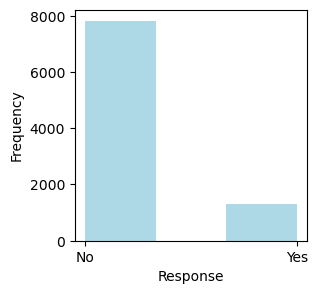

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize =(3,3))
ax.hist(freq_resp, rwidth=4, align='mid', color='lightblue', bins=3)
ax.set_xlabel('Response')
ax.set_ylabel('Frequency')

In [ ]:
sc = mca_clean['sales_channel'].unique()
from operator import truediv
rr_sc = list(map(truediv, list(mca_clean.loc[mca_clean['response'] == 'Yes', ['sales_channel']].value_counts()*100), list(mca_clean['sales_channel'].value_counts())))

In [57]:
tca = [200,400,600,800,1000,1200]
mca_tca = mca_clean.loc[mca_clean['response'] == 'Yes', ['total_claim_amount']]
yes_tca = rr_tca = [0]*6
rr_tca = [0]*6

for i in mca_tca['total_claim_amount']:
    if i < tca[0]: 
        yes_tca[0] +=1
    elif i < tca[1]: 
        yes_tca[1] +=1
    elif i < tca[2]: 
        yes_tca[2] +=1
    elif i < tca[3]: 
        yes_tca[3] +=1
    elif i < tca[4]: 
        yes_tca[4] +=1
    else: 
        yes_tca[5] +=1

for i in mca_clean['total_claim_amount']:
    if i < tca[0]: 
        rr_tca[0] +=1
    elif i < tca[1]: 
        rr_tca[1] +=1
    elif i < tca[2]: 
        rr_tca[2] +=1
    elif i < tca[3]: 
        rr_tca[3] +=1
    elif i < tca[4]: 
        rr_tca[4] +=1
    else: 
        rr_tca[5] +=1

freq_tca = list(map(truediv, yes_tca, rr_tca))
freq_tca = list(map(truediv, freq_tca, [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]))

In [61]:
inc= [20000,40000,60000,80000,100000]
mca_inc = mca_clean.loc[mca_clean['response'] == 'Yes', ['income']]
yes_inc = [0]*5
rr_inc = [0]*5

for i in mca_inc['income']:
    if i < inc[0]: 
        yes_inc[0] +=1
    elif i < inc[1]: 
        yes_inc[1] +=1
    elif i < inc[2]: 
        yes_inc[2] +=1
    elif i < inc[3]: 
        yes_inc[3] +=1
    else: 
        yes_inc[4] +=1

for i in mca_clean['income']:
    if i < inc[0]: 
        rr_inc[0] +=1
    elif i < inc[1]: 
        rr_inc[1] +=1
    elif i < inc[2]: 
        rr_inc[2] +=1
    elif i < inc[3]: 
        rr_inc[3] +=1
    else: 
        rr_inc[4] +=1

freq_inc = list(map(truediv, yes_inc, rr_inc))
freq_inc = list(map(truediv, freq_inc, [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]))

Text(0.5, 1.0, 'Response rate by Income')

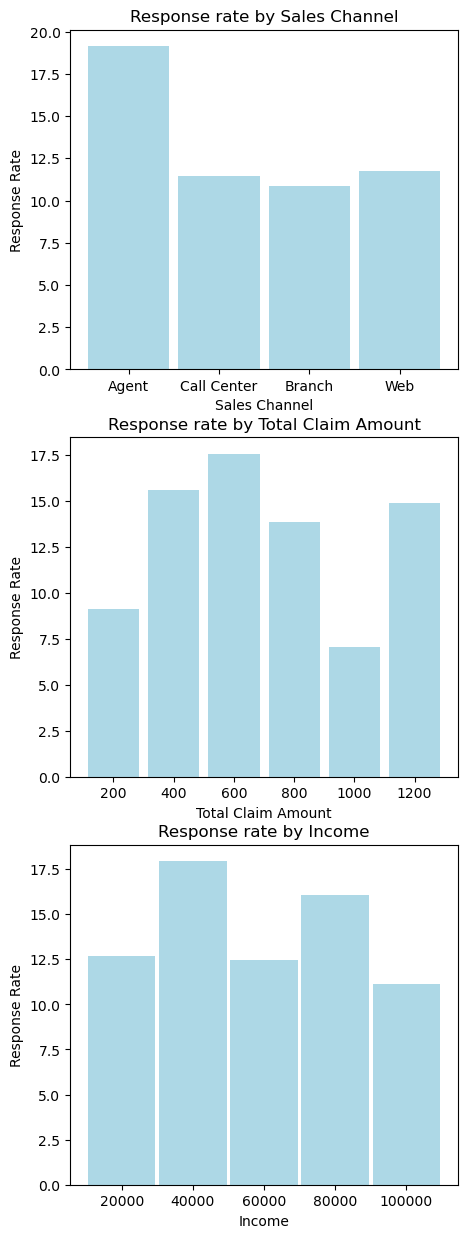

In [62]:
fig, axes = plt.subplots(3,1,figsize=(5,15))
axes[0].bar(sc, rr_sc, width=0.9, align='center', color='lightblue')
axes[0].set_xlabel('Sales Channel')
axes[0].set_ylabel('Response Rate')
axes[0].set_title('Response rate by Sales Channel')
axes[1].bar(tca, freq_tca, width=170, align='center', color='lightblue')
axes[1].set_xlabel('Total Claim Amount')
axes[1].set_ylabel('Response Rate')
axes[1].set_title('Response rate by Total Claim Amount')
axes[2].bar(inc, freq_inc, width=19000, align='center', color='lightblue')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Response Rate')
axes[2].set_title('Response rate by Income')